# 飞舞的线条





## 曲线图的绘制


### 注意事项

- 清晰
- 重点突出
- Legends




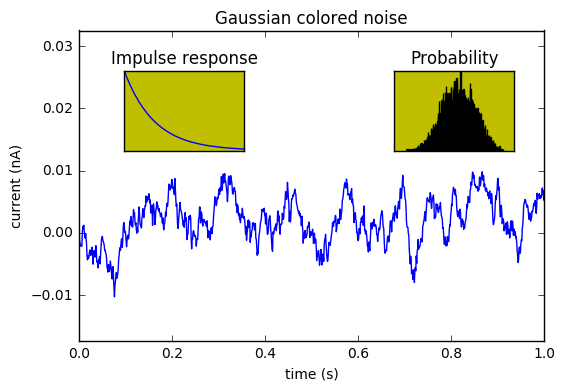

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], axisbg='y')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], axisbg='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

## pyplot包的使用

The `pyplot` interface is rich with a multitude of plotting functions. Going through each one in detail could be a course in and of itself, not to mention that it wouldn't be the best, or most interesting, use of our time. Instead, over the next few lessons, we'll walk through a handful of some of the more common plotting functions and leave the rest for you to explore in the well written, and thorough, matplotlib documentation.

In this lesson we'll explore the `plot` function to get a feel for just how flexible and powerful matplotlib's functions can be. By the end of this lesson, you should know how to use the `plot` function to display data in a line graph, and you should also have a decent feel for how to "think" about the interface that each plotting function provides.

With that, let's jump right in and take a look at some code.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
df = pd.read_csv('../data/data.csv', index_col='Year')

### The `plot` Command

Matplotlib's `plot` command can be used to plot lines and/or markers on a graph, and in many cases this will be your "go to" plotting command, so it's only fitting that we take a slightly more extensive look at its interface. What I think you'll find, after working through the next few examples, is that the `plot` command is both extremely flexible, accommodating data in many different formats, and powerful, allowing you to specify the look and feel of each line in a graph through a simple format string, or set of keyword arguments. 

Before we can explore what the `plot` command has to offer though, we'll need to create a little bit of data to play around with. We'll use the NumPy library to create a few random samples for us. 

The code below uses the `numpy.random.randn` function to create three sets of random data drawn from the normal distribution.

In [ ]:
l1, l2, l3 = np.random.randn(3, 200)

In [ ]:
plt.plot(l1);

When we pass in a single list of values, the `plot` command assumes that we are passing in a list of `y-axis` values and it automatically creates a list of corresponding `x` values. Essentially, it will call the `range` function on the length of the list we passed in to generate the list of `x` values. 

Often, this is all we really need to do to plot our data, but sometimes it's necessary to pass in a list of values for the `x-axis` as well. When you need to do that, you can just pass in two lists, where the first is the list of values for the `x-axis`, and the second is the list of `y-axis` values.

In the example below we're going to assume that our `x-axis` values start from a value other than `0`. So, we'll create a list of fake `x-axis` values by calling the `range` function and creating a list of values equal in length to that of the `y` values list, but offset by `10`. Then we call the `plot` function again, this time passing in our list of `x-axis` values first, followed by the list of `y-axis` values.

In [ ]:
xs = range(10, 10 + len(l1))
plt.plot(xs, l1);

If the second or third parameter is a string, the `plot` function assumes that it's a format string describing how the line should be displayed. The format string can describe how the line looks, e.g., is it dashed or solid, what types of markers are used to identify each data point, and what color is used to draw the line. 

Let's give it a try now by redrawing our graph, but this time, we'll draw a dashed, red line with squares as markers. To do so, simply pass in a string as the second parameter to the `plot` command containing the letter `'r'` to make the line red, a couple of hyphens (`'--'`) to make it dashed, and the letter `'s'` to mark each data point with a square. 

In [ ]:
plt.plot(l1, 'r--s')

Pretty nice! There's a lot of power in that dense little string, and you can find the full list of format string options in the [`plot` function's documentation][1] on the matplotlib website.

[1]: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

### Plotting Multiple Lines

So, we've learned how to display a single set of data points in several different ways using the `plot` function, but what if we have multiple lines that we want to plot? Well, the `plot` function makes that super easy, you simply, pass in a second set of values. There is a catch though, if you're thinking you'll just pass in all three lists from above and get three lines, like we're doing in the following bit of code, you'd be mistaken.


In [ ]:
plt.plot(l1, l2, l3)

Hmm, looks like we got an invalid value error. This makes sense though, doesn't it? The error we're getting is that the "third arg[ument] must be a format string". The problem is the flexibility of the `plot` function's interface. As we've already seen, we can pass in either a single list of `y` values and an optional format string or a list of `x` and a list of `y` values and, again, an optional format string. In the example above, the `plot` function thinks we're going with the second option and so it's expecting the third parameter to be the optional format string, but instead it sees another list and it throws an error.

To fix this, we have a few options. We can pass in the optional format string for each of our lists, like the example below shows.

In [ ]:
plt.plot(l1, '', l2, '', l3, '');

Notice in the example above, I am passing in an empty string for each line's format string. Doing so makes the string act as a simple delimiter for the `plot` function to parse out each line's data, but it doesn't affect the look of the line itself. In other words, we'll still get the default look for each line, and we'll leave the selection of color for each line up to the `plot` function. 

> Incidentally, if you're curious, matplotlib determines the color of each line by cycling through a list of colors that's defined in its configuration. You can execute the following line of code to see the list of colors matplotlib uses for each line.

## 让他看起来更好一些

首先，python 有一个专门的配色包[jiffyclub/brewer2mpl(GitHub)](https://github.com/jiffyclub/brewer2mpl)，提供了从美术角度来讲的精美配色（戳这里感受ColorBrewer: Color Advice for Maps）。

此外还有一些致力于美化绘图的库，用起来也都非常方便，比如[olgabot/prettyplotlib(GitHub)](https://github.com/olgabot/prettyplotlib)。



